In [1]:
import os
import numpy as np
import pandas as pd

os.environ['TEJAPI_BASE'] = 'https://api.tej.com.tw'
os.environ['TEJAPI_KEY'] = "ZlmnASAtE0FXyBsejatM1lC1goOq32"




## 使用 `get_universe()` 函式取得股票池
`get_universe()` 函數可以幫助我們抓取特定的股票池（市場、板塊、證券種類、產業）。  
比較每一元保留盈餘是否創造超過一元的市場價值時，由於牽涉到公司上市年限是否夠久，我們選取上市期間大於 7 年的公司。  
另外，因為 ROE 可以藉由舉債來提升，因此我們排除金融產業這類高槓桿的產業。

p.s. 關於 `get_universe()` 的說明，可參考 TQuant Lab github：[get_universe 說明](https://github.com/tejtw/TQuant-Lab/blob/main/lecture/get_universe%E8%AA%AA%E6%98%8E.ipynb)

In [2]:
from zipline.sources.TEJ_Api_Data import get_universe

pool = get_universe(start = '2022-08-01', 
                    end = '2022-12-31',  # 選取 2023 年年底已上市的股票
                    mkt_bd_e = 'TSE',  # 已上市之股票
                    stktp_e = 'Common Stock',  # 普通股 
                   )
pool

Currently used TEJ API key call quota 474/1000 (47.4%)
Currently used TEJ API key data quota 2796507/10000000 (27.97%)


['1101',
 '1102',
 '1103',
 '1104',
 '1108',
 '1109',
 '1110',
 '1201',
 '1203',
 '1210',
 '1213',
 '1215',
 '1216',
 '1217',
 '1218',
 '1219',
 '1220',
 '1225',
 '1227',
 '1229',
 '1231',
 '1232',
 '1233',
 '1234',
 '1235',
 '1236',
 '1301',
 '1303',
 '1304',
 '1305',
 '1307',
 '1308',
 '1309',
 '1310',
 '1312',
 '1313',
 '1314',
 '1315',
 '1316',
 '1319',
 '1321',
 '1323',
 '1324',
 '1325',
 '1326',
 '1339',
 '1342',
 '1402',
 '1409',
 '1410',
 '1413',
 '1414',
 '1416',
 '1417',
 '1418',
 '1419',
 '1423',
 '1432',
 '1434',
 '1435',
 '1436',
 '1437',
 '1438',
 '1439',
 '1440',
 '1441',
 '1442',
 '1443',
 '1444',
 '1445',
 '1446',
 '1447',
 '1449',
 '1451',
 '1452',
 '1453',
 '1454',
 '1455',
 '1456',
 '1457',
 '1459',
 '1460',
 '1463',
 '1464',
 '1465',
 '1466',
 '1467',
 '1468',
 '1470',
 '1471',
 '1472',
 '1473',
 '1474',
 '1475',
 '1476',
 '1477',
 '1503',
 '1504',
 '1506',
 '1512',
 '1513',
 '1514',
 '1515',
 '1516',
 '1517',
 '1519',
 '1521',
 '1522',
 '1524',
 '1525',
 '1526',
 

In [3]:
len(pool)

899

In [4]:
import TejToolAPI
start_time = pd.Timestamp('2022-08-01')
end_time = pd.Timestamp('2022-12-31')  # 將時間字串轉換成時間格式

data = TejToolAPI.get_history_data(start = start_time,
                                   end = end_time,
                                   ticker = pool,
                                   fin_type = 'A', # 為累計資料，舉例來說，Q3累計：1月～9月的資料。
                                   columns = ['主產業別_中文','coid', 'pbr_tej','股利殖利率','收盤價','本益比','稅後淨利成長率'],
                                   transfer_to_chinese = True)



data

Currently used TEJ API key call quota 567/1000 (56.7%)
Currently used TEJ API key data quota 3525795/10000000 (35.26%)


,股票代碼,日期,主產業別_中文,本益比,股利殖利率,股價淨值比_TEJ,收盤價,稅後淨利成長率_A
0,1101,2022-08-01,M1100 水泥工業,13.76,5.06,1.2389,39.50,-77.04
1,1101,2022-08-02,M1100 水泥工業,13.64,5.11,1.2279,39.15,-77.04
2,1101,2022-08-03,M1100 水泥工業,13.62,5.12,1.2263,39.10,-77.04
3,1101,2022-08-04,M1100 水泥工業,13.50,5.16,1.2153,38.75,-77.04
4,1101,2022-08-05,M1100 水泥工業,13.54,5.15,1.2185,38.85,-77.04
...,...,...,...,...,...,...,...,...
96344,9958,2022-12-26,M2000 鋼鐵工業,28.83,3.47,2.7977,86.20,-64.57
96345,9958,2022-12-27,M2000 鋼鐵工業,29.43,3.40,2.8561,88.00,-64.57
96346,9958,2022-12-28,M2000 鋼鐵工業,30.74,3.25,2.9827,91.90,-64.57
96347,9958,2022-12-29,M2000 鋼鐵工業,30.37,3.29,2.9470,90.80,-64.57


In [5]:
data

,股票代碼,日期,主產業別_中文,本益比,股利殖利率,股價淨值比_TEJ,收盤價,稅後淨利成長率_A
0,1101,2022-08-01,M1100 水泥工業,13.76,5.06,1.2389,39.50,-77.04
1,1101,2022-08-02,M1100 水泥工業,13.64,5.11,1.2279,39.15,-77.04
2,1101,2022-08-03,M1100 水泥工業,13.62,5.12,1.2263,39.10,-77.04
3,1101,2022-08-04,M1100 水泥工業,13.50,5.16,1.2153,38.75,-77.04
4,1101,2022-08-05,M1100 水泥工業,13.54,5.15,1.2185,38.85,-77.04
...,...,...,...,...,...,...,...,...
96344,9958,2022-12-26,M2000 鋼鐵工業,28.83,3.47,2.7977,86.20,-64.57
96345,9958,2022-12-27,M2000 鋼鐵工業,29.43,3.40,2.8561,88.00,-64.57
96346,9958,2022-12-28,M2000 鋼鐵工業,30.74,3.25,2.9827,91.90,-64.57
96347,9958,2022-12-29,M2000 鋼鐵工業,30.37,3.29,2.9470,90.80,-64.57


In [6]:
import os
import pandas as pd
import numpy as np
import tejapi
import matplotlib.pyplot as plt

latest_list_date = tejapi.fastget('TWN/APISTOCK', coid = pool, paginate = True, chinese_column_name = True, opts = {'columns':['coid', 'mdate', 'list_date']})
data1 = data.merge(latest_list_date, left_on=['股票代碼'], right_on=['公司簡稱'], how='left')
data1.drop(columns=['公司簡稱', '目前狀態'], inplace=True)
data1['已上市天數'] = (data1['日期'] - data1['最近一次上市日']).dt.days
new_onboard_company = data1.query("日期 == 日期.max() & 已上市天數 < 365")['股票代碼'].unique()
new_onboard_company

Matplotlib is building the font cache; this may take a moment.


array(['3715'], dtype=object)

In [7]:
data = data[~data['股票代碼'].isin(new_onboard_company)].reset_index(drop=True)

In [26]:
import pandas as pd

# 假設 data1 是您的數據框架
data_last_1Y = data1[data1['日期'] == '2022-08-01'].reset_index(drop=True)

# 檢查初始篩選的數據框
print(data_last_1Y.head())

# 逐步應用篩選條件
condition1 = data_last_1Y[
    (data_last_1Y['股價淨值比_TEJ'] < 0.8) &
    (data_last_1Y['本益比'] / data_last_1Y['稅後淨利成長率_A'] < 0.8) &
    (data_last_1Y['本益比'] / data_last_1Y['稅後淨利成長率_A'] > 0) &
    (data_last_1Y['股利殖利率'] > 3) 
   
]

# 檢查篩選後的數據框是否為空
print(condition1)

# 指定要保留的列
columns = ['股票代碼', '股價淨值比_TEJ', '股利殖利率', '收盤價', '本益比', '稅後淨利成長率_A']
filtered_data = condition1[columns]

# 輸出篩選結果
print(filtered_data)

# 提取所有股票代碼並轉換為列表形式
stock_codes_list = filtered_data['股票代碼'].tolist()



   股票代碼         日期     主產業別_中文    本益比  股利殖利率  股價淨值比_TEJ    收盤價  稅後淨利成長率_A  \
0  1101 2022-08-01  M1100 水泥工業  13.76   5.06     1.2389  39.50     -77.04   
1  1102 2022-08-01  M1100 水泥工業  10.18   8.22     0.8891  41.35     -29.42   
2  1103 2022-08-01  M1100 水泥工業  16.70   3.57     0.5511  18.20     -35.79   
3  1104 2022-08-01  M1100 水泥工業  10.38   4.52     0.7129  22.10     127.03   
4  1108 2022-08-01  M1100 水泥工業  16.69   5.53     0.9856  10.85       0.84   

     最近一次上市日  已上市天數  
0 1962-02-09  22088  
1 1962-06-18  21959  
2 1969-11-27  19240  
3 1971-02-02  18808  
4 1990-06-06  11744  
     股票代碼         日期     主產業別_中文     本益比  股利殖利率  股價淨值比_TEJ    收盤價  稅後淨利成長率_A  \
3    1104 2022-08-01  M1100 水泥工業   10.38   4.52     0.7129  22.10     127.03   
37   1315 2022-08-01  M1300 塑膠工業  119.82   6.59     0.5813  68.30     160.29   
73   1451 2022-08-01  M1400 紡織纖維   12.62   4.33     0.6338  23.10     180.70   
85   1466 2022-08-01  M1400 紡織纖維    7.59   8.03     0.7680  12.45       9.63   
115  

In [27]:
print(stock_codes_list)

['1104', '1315', '1451', '1466', '1531', '1906', '2316', '2362', '2468', '2501', '2515', '2617', '2852', '3432', '5533', '8213', '9944', '9946']


## 取出符合所有條件的股票

In [28]:
tickers = list(stock_codes_list)
tickers

['1104',
 '1315',
 '1451',
 '1466',
 '1531',
 '1906',
 '2316',
 '2362',
 '2468',
 '2501',
 '2515',
 '2617',
 '2852',
 '3432',
 '5533',
 '8213',
 '9944',
 '9946']

In [29]:
len(tickers)

18

## 查看標的證券名稱與產業

In [30]:
import tejapi

tejapi.ApiConfig.api_key = "ZlmnASAtE0FXyBsejatM1lC1goOq32"
tejapi.ApiConfig.ignoretz = 'https://api.tej.com.tw'

ticker_data = tejapi.get('TWN/APISTOCK',  # 證券屬性資料表
                  coid = tickers,
                  opts = {'columns':['coid', 'stk_name']},
                  chinese_column_name = True,
                  paginate = True)

ticker_data

,公司簡稱,證券名稱
None,,
0,1104,環泥
1,1315,達新
2,1451,年興
3,1466,聚隆
4,1531,高林股
5,1906,寶隆
6,2316,楠梓電
7,2362,藍天
8,2468,華經


## 利用 TQuant Lab 回測股票池買進持有 1 年的績效

### 導入股價資料
在 zipline 中，我們使用 `os` 搭配 `!zipline ingest` 將股價資料導入到本地端。常用寫法為:
``` python
!zipline ingest -b tquant
```
在 ingest 之前，需先使用 `os` 設定環境變數，
``` python
os.environ['mdate'] = start + ' ' + end
os.environ['ticker'] = ' '.join(tickers) + ' ' + 'IR0001'  
# IR0001 為加權股價報酬指數，通常用來當作回測 benchmark。
```

In [31]:
start = '2022-08-01'
end = '2022-12-31'

os.environ['mdate'] = start + ' ' + end
os.environ['ticker'] = ' '.join(tickers) + ' ' + 'IR0001'

!zipline ingest -b tquant

Merging daily equity files:
Currently used TEJ API key call quota 583/1000 (58.3%)
Currently used TEJ API key data quota 3557179/10000000 (35.57%)


[2024-06-13 07:14:09.871389] INFO: zipline.data.bundles.core: Ingesting tquant.
[2024-06-13 07:14:13.352481] INFO: zipline.data.bundles.core: Ingest tquant successfully.


### Initialize 函式

`initialize` 為構建 zipline 交易策略的重要函式，會在回測開始前被呼叫一次，主要任務為設定回測環境，常見用於設定滑價或手續費。  
zipline 提供四種滑價計算方法與三種手續費計算方法。於此範例中，我們使用 `VolumeShareSlippage` 計算滑價、`Custom_TW_Commission` 計算手續費。

註：
- 滑價設定方法可參考： TQuant Lab github：[zipline slippage model](https://github.com/tejtw/TQuant-Lab/blob/main/lecture/Zipline%20Slippage.ipynb)
- 手續費設定方法可參考： TQuant Lab github：[zipline commission model](https://github.com/tejtw/TQuant-Lab/blob/main/lecture/Zipline%20Commission%20Models.ipynb)

除此之外，我們可以注意到 initialize 含有一個參數 **context__**，**context__** 為一個命名空間 (namespace)，可以在儲存各種自定義之變數並且在每次交易日中循環呼叫。  舉例來說，我們設置一個變數 (context.day = 0) 來計算交易日天數與一個變數 (context.tickers = tickers) 紀錄股票標的。

In [32]:
from zipline.api import *
from zipline.finance import commission, slippage

def initialize(context):
    context.day = 0
    context.tickers = tickers
    set_slippage(slippage.VolumeShareSlippage(volume_limit = 0.025, price_impact = 0.1))
    set_commission(commission.Custom_TW_Commission(min_trade_cost = 20, discount = 1.0, tax = 0.003))
    set_benchmark(symbol('IR0001'))

### Handle_data 函式

`handle_data` 為構建 zipline 交易策略的重要函式，會在回測開始後每天被呼叫，主要任務為設定交易策略、下單與紀錄交易資訊。  
在此範例中，我們加入下單函式 `order_percent`，用以將資產均分購買股票池中的股票。 

註：
- `order_percent` 使用方法可參考： TQuant Lab github：[Zipline Order (percent & target_percent)](https://github.com/tejtw/TQuant-Lab/blob/main/lecture/Zipline%20Order%20(percent%20%26%20target_percent).ipynb)

In [33]:
def handle_data(context, data):

    # 回測第一天買進
    if context.day == 0:
        for ticker in context.tickers:
            order_percent(symbol(ticker), 1 / len(tickers))

    context.day += 1  # 以免重複買進，並紀錄交易天數

### Analyze 函式

`analyze` 主要用於回測後視覺化策略績效與風險，這裡我們以 `matplotlib` 繪製投組價值與大盤走勢的比較圖。  
其中 `analyze` 有兩個參數 **context** 與 **results**，**context** 就與上述相同，用以紀錄交易訊息，**results** 就是最終 ``run_algorithm`` 輸出的資料表 -- *results*。我們可以提取裡面特定欄位來繪製圖表。

In [34]:
import matplotlib.pyplot as plt

capital_base = 1e7  # 設定初始資金

def analyze(context, results):

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    results['benchmark_cum'] = results.benchmark_return.add(1).cumprod() * capital_base
    results[['portfolio_value', 'benchmark_cum']].plot(ax = ax1, label = 'Portfolio Value($)')
    ax1.set_ylabel('Portfolio value (TWD)')

    plt.legend(loc = 'upper left')

    plt.gcf().set_size_inches(18, 8)
    plt.grid()
    plt.show()

### Run_algorithm 函式

進行策略回測。

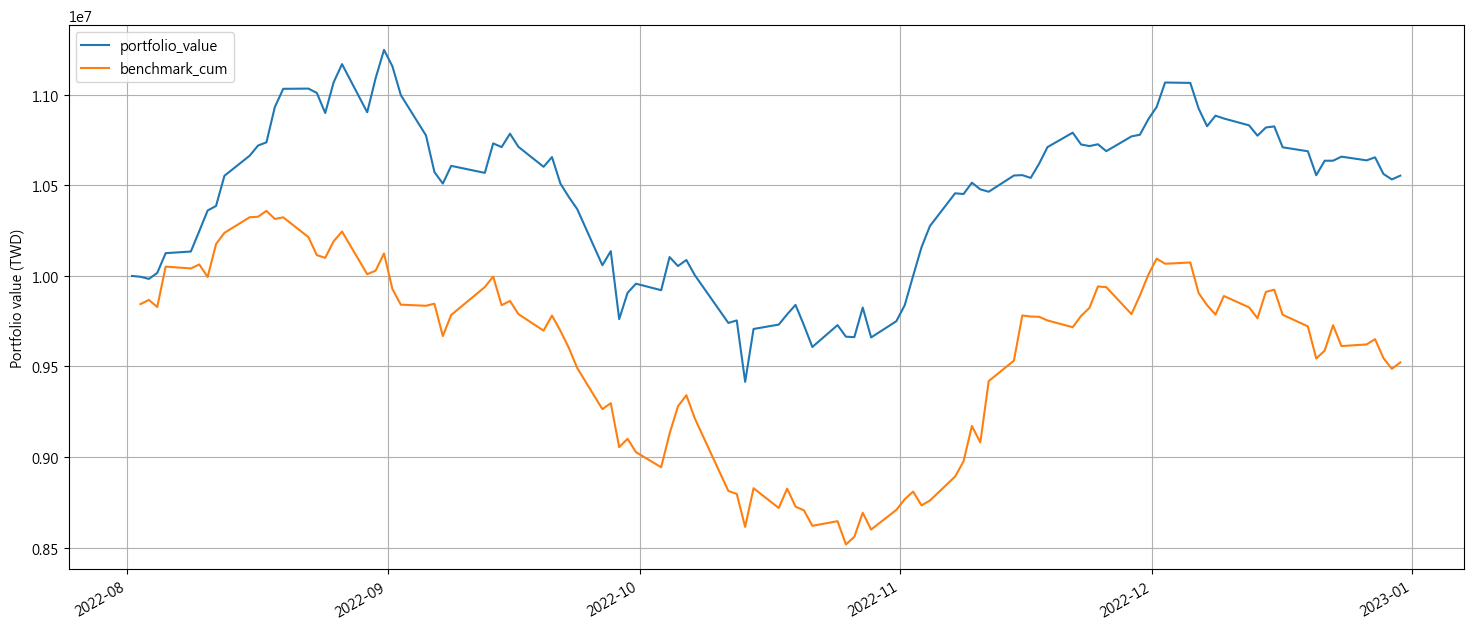

,period_open,period_close,capital_used,ending_cash,benchmark_return,longs_count,portfolio_value,pnl,shorts_count,returns,...,algorithm_period_return,treasury_period_return,sharpe,trading_days,algo_volatility,sortino,alpha,beta,max_drawdown,benchmark_cum
2022-08-01 13:30:00+08:00,2022-08-01 09:01:00+08:00,2022-08-01 13:30:00+08:00,0.000000e+00,1.000000e+07,NaN,0,1.000000e+07,0.000000,0,0.000000,...,0.000000,0.0,NaN,1,NaN,NaN,NaN,NaN,0.000000,NaN
2022-08-02 13:30:00+08:00,2022-08-02 09:01:00+08:00,2022-08-02 13:30:00+08:00,-2.997439e+06,7.002561e+06,-0.015551,18,9.995563e+06,-4437.262189,0,-0.000444,...,-0.000444,0.0,-11.224972,2,0.004981,-11.224972,NaN,NaN,-0.000444,9.844494e+06
2022-08-03 13:30:00+08:00,2022-08-03 09:01:00+08:00,2022-08-03 13:30:00+08:00,-1.894547e+06,5.108015e+06,0.002337,18,9.983536e+06,-12026.982407,0,-0.001203,...,-0.001646,0.0,-14.322312,3,0.009659,-11.770208,-0.242979,-0.042460,-0.001646,9.867499e+06
2022-08-04 13:30:00+08:00,2022-08-04 09:01:00+08:00,2022-08-04 13:30:00+08:00,-1.432026e+06,3.675988e+06,-0.003970,18,1.001674e+07,33206.654831,0,0.003326,...,0.001674,0.0,3.331615,4,0.031753,10.392745,0.156514,0.003049,-0.001646,9.828325e+06
2022-08-05 13:30:00+08:00,2022-08-05 09:01:00+08:00,2022-08-05 13:30:00+08:00,-5.717939e+05,3.104194e+06,0.022711,18,1.012579e+07,109048.790758,0,0.010887,...,0.012579,0.0,7.993177,5,0.079232,69.561430,0.995758,0.286268,-0.001646,1.005153e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26 13:30:00+08:00,2022-12-26 09:01:00+08:00,2022-12-26 13:30:00+08:00,0.000000e+00,1.441828e+05,0.000953,18,1.063820e+07,-20592.060000,0,-0.001932,...,0.063820,0.0,0.901164,104,0.185377,1.223245,0.233204,0.554585,-0.162949,9.621825e+06
2022-12-27 13:30:00+08:00,2022-12-27 09:01:00+08:00,2022-12-27 13:30:00+08:00,0.000000e+00,1.441828e+05,0.003031,18,1.065498e+07,16778.310000,0,0.001577,...,0.065498,0.0,0.917395,105,0.184489,1.245256,0.230398,0.554399,-0.162949,9.650986e+06
2022-12-28 13:30:00+08:00,2022-12-28 09:01:00+08:00,2022-12-28 13:30:00+08:00,0.000000e+00,1.441828e+05,-0.010840,18,1.056309e+07,-91892.560000,0,-0.008624,...,0.056309,0.0,0.799000,106,0.184167,1.082580,0.220537,0.556554,-0.162949,9.546370e+06
2022-12-29 13:30:00+08:00,2022-12-29 09:01:00+08:00,2022-12-29 13:30:00+08:00,0.000000e+00,1.441828e+05,-0.006214,18,1.053300e+07,-30087.430000,0,-0.002848,...,0.053300,0.0,0.758381,107,0.183372,1.027388,0.220020,0.556617,-0.162949,9.487049e+06


In [35]:
from zipline import run_algorithm
from zipline.utils.run_algo import get_transaction_detail

start_date = pd.Timestamp(start, tz = 'utc')
end_date = pd.Timestamp(end, tz = 'utc')  # 轉換成時間序列格式

results = run_algorithm(
    start = start_date,
    end = end_date,
    initialize = initialize,
    handle_data = handle_data,
    analyze = analyze,
    bundle = 'tquant',
    capital_base = capital_base,
)

# 取出 results 中的 positions, transactions & orders 資料表
positions, transactions, orders = get_transaction_detail(results)   
results

<Axes: >

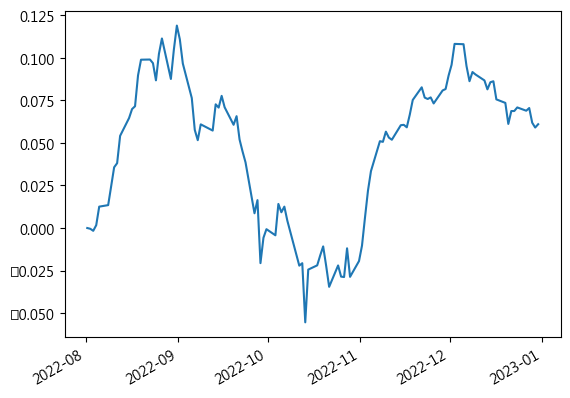

In [36]:
results.returns.cumsum().plot()  # 繪製累積回報圖

## Pyfolio

Pyfolio 與 zipline 的回測結果兼容，讓我們輕鬆用幾行程式碼，就能產出我們需要的投資風險及績效圖表。

p.s. 詳細 Pyfolio 使用方法可參考： TQuant Lab github：[Pyfolio](https://github.com/tejtw/TQuant-Lab/blob/main/lecture/Pyfolio.ipynb)

In [37]:
from pyfolio.utils import extract_rets_pos_txn_from_zipline
import pyfolio

returns, positions, transactions = extract_rets_pos_txn_from_zipline(results)  # 從 results 資料表中取出 returns, positions & transactions
benchmark_rets = results.benchmark_return  # 取出 benchmark 的報酬率

Start date,2022-08-01
End date,2022-12-30
Total months,5
,Backtest
Annual return,13.398%
Cumulative returns,5.536%
Annual volatility,18.253%
Sharpe ratio,0.78
Calmar ratio,0.82
Stability,0.01
Max drawdown,-16.295%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,16.29,2022-08-31,2022-10-13,NaT,NaN
1,2.38,2022-08-26,2022-08-29,2022-08-31,4
2,1.22,2022-08-22,2022-08-24,2022-08-25,4
3,0.16,2022-08-01,2022-08-03,2022-08-04,4
4,NaN,NaT,NaT,NaT,NaN


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the foll

Stress Events,mean,min,max
New Normal,0.06%,-3.70%,3.10%


Top 10 long positions of all time,max
sid,
2468,12.67%
3432,9.56%
1451,5.98%
5533,5.87%
2362,5.86%
1315,5.75%
2852,5.71%
9944,5.69%
1906,5.69%


Top 10 short positions of all time,max
sid,


Top 10 positions of all time,max
sid,
2468,12.67%
3432,9.56%
1451,5.98%
5533,5.87%
2362,5.86%
1315,5.75%
2852,5.71%
9944,5.69%
1906,5.69%


Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


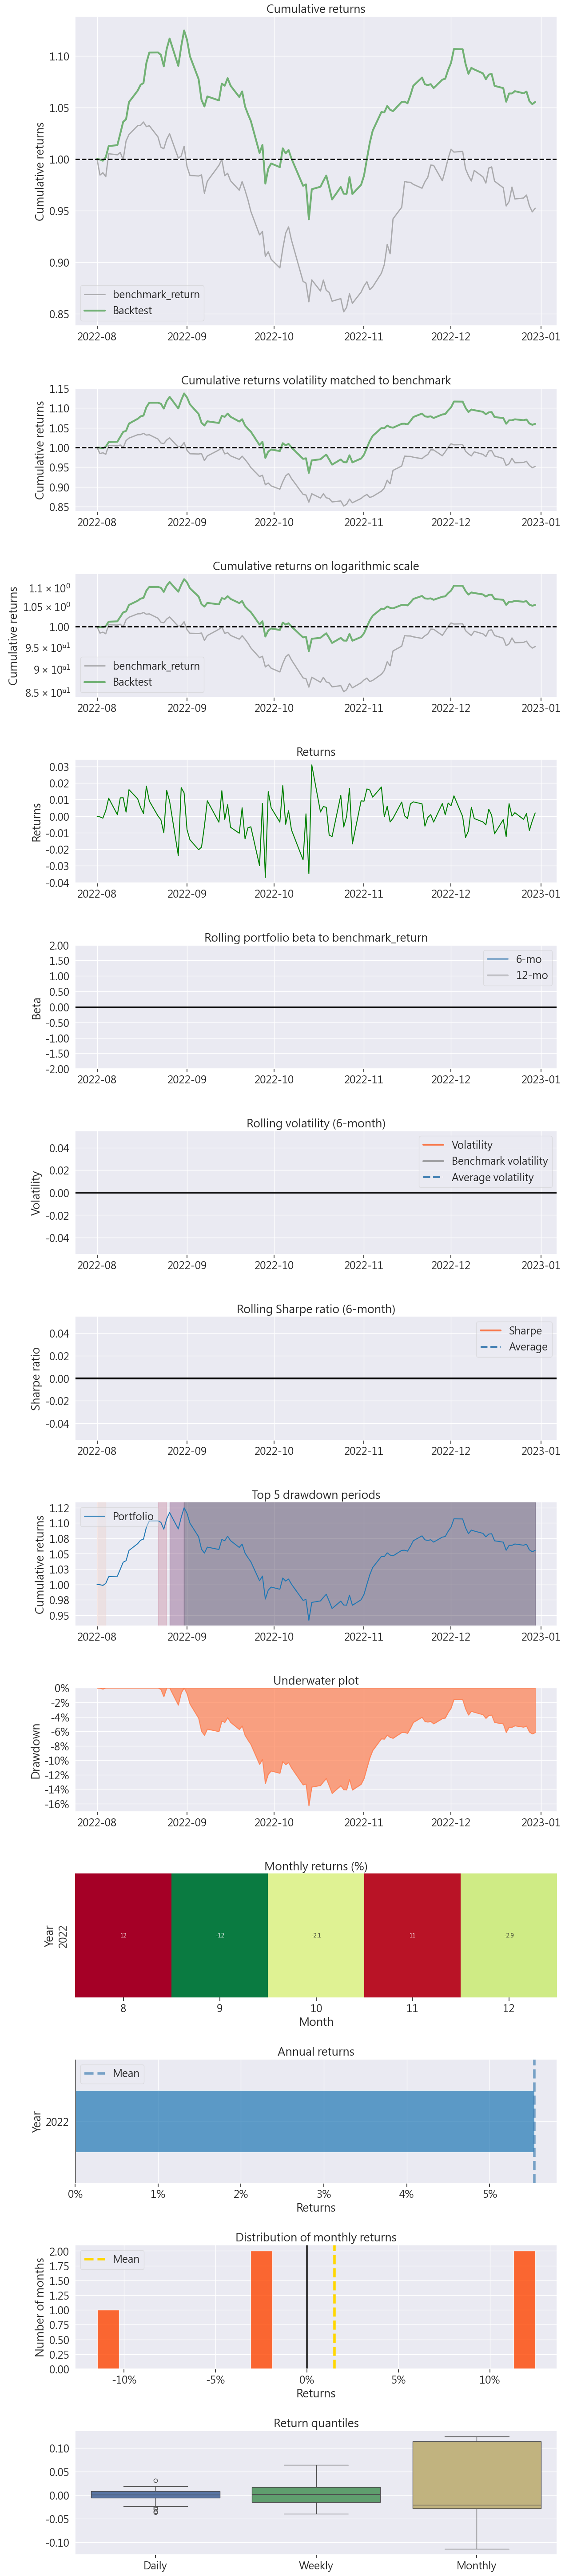

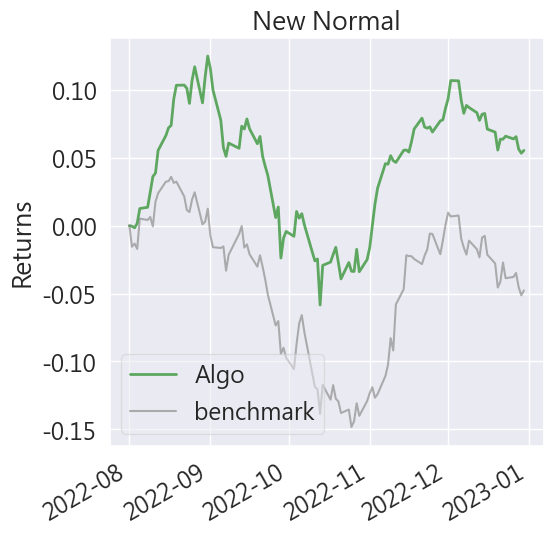

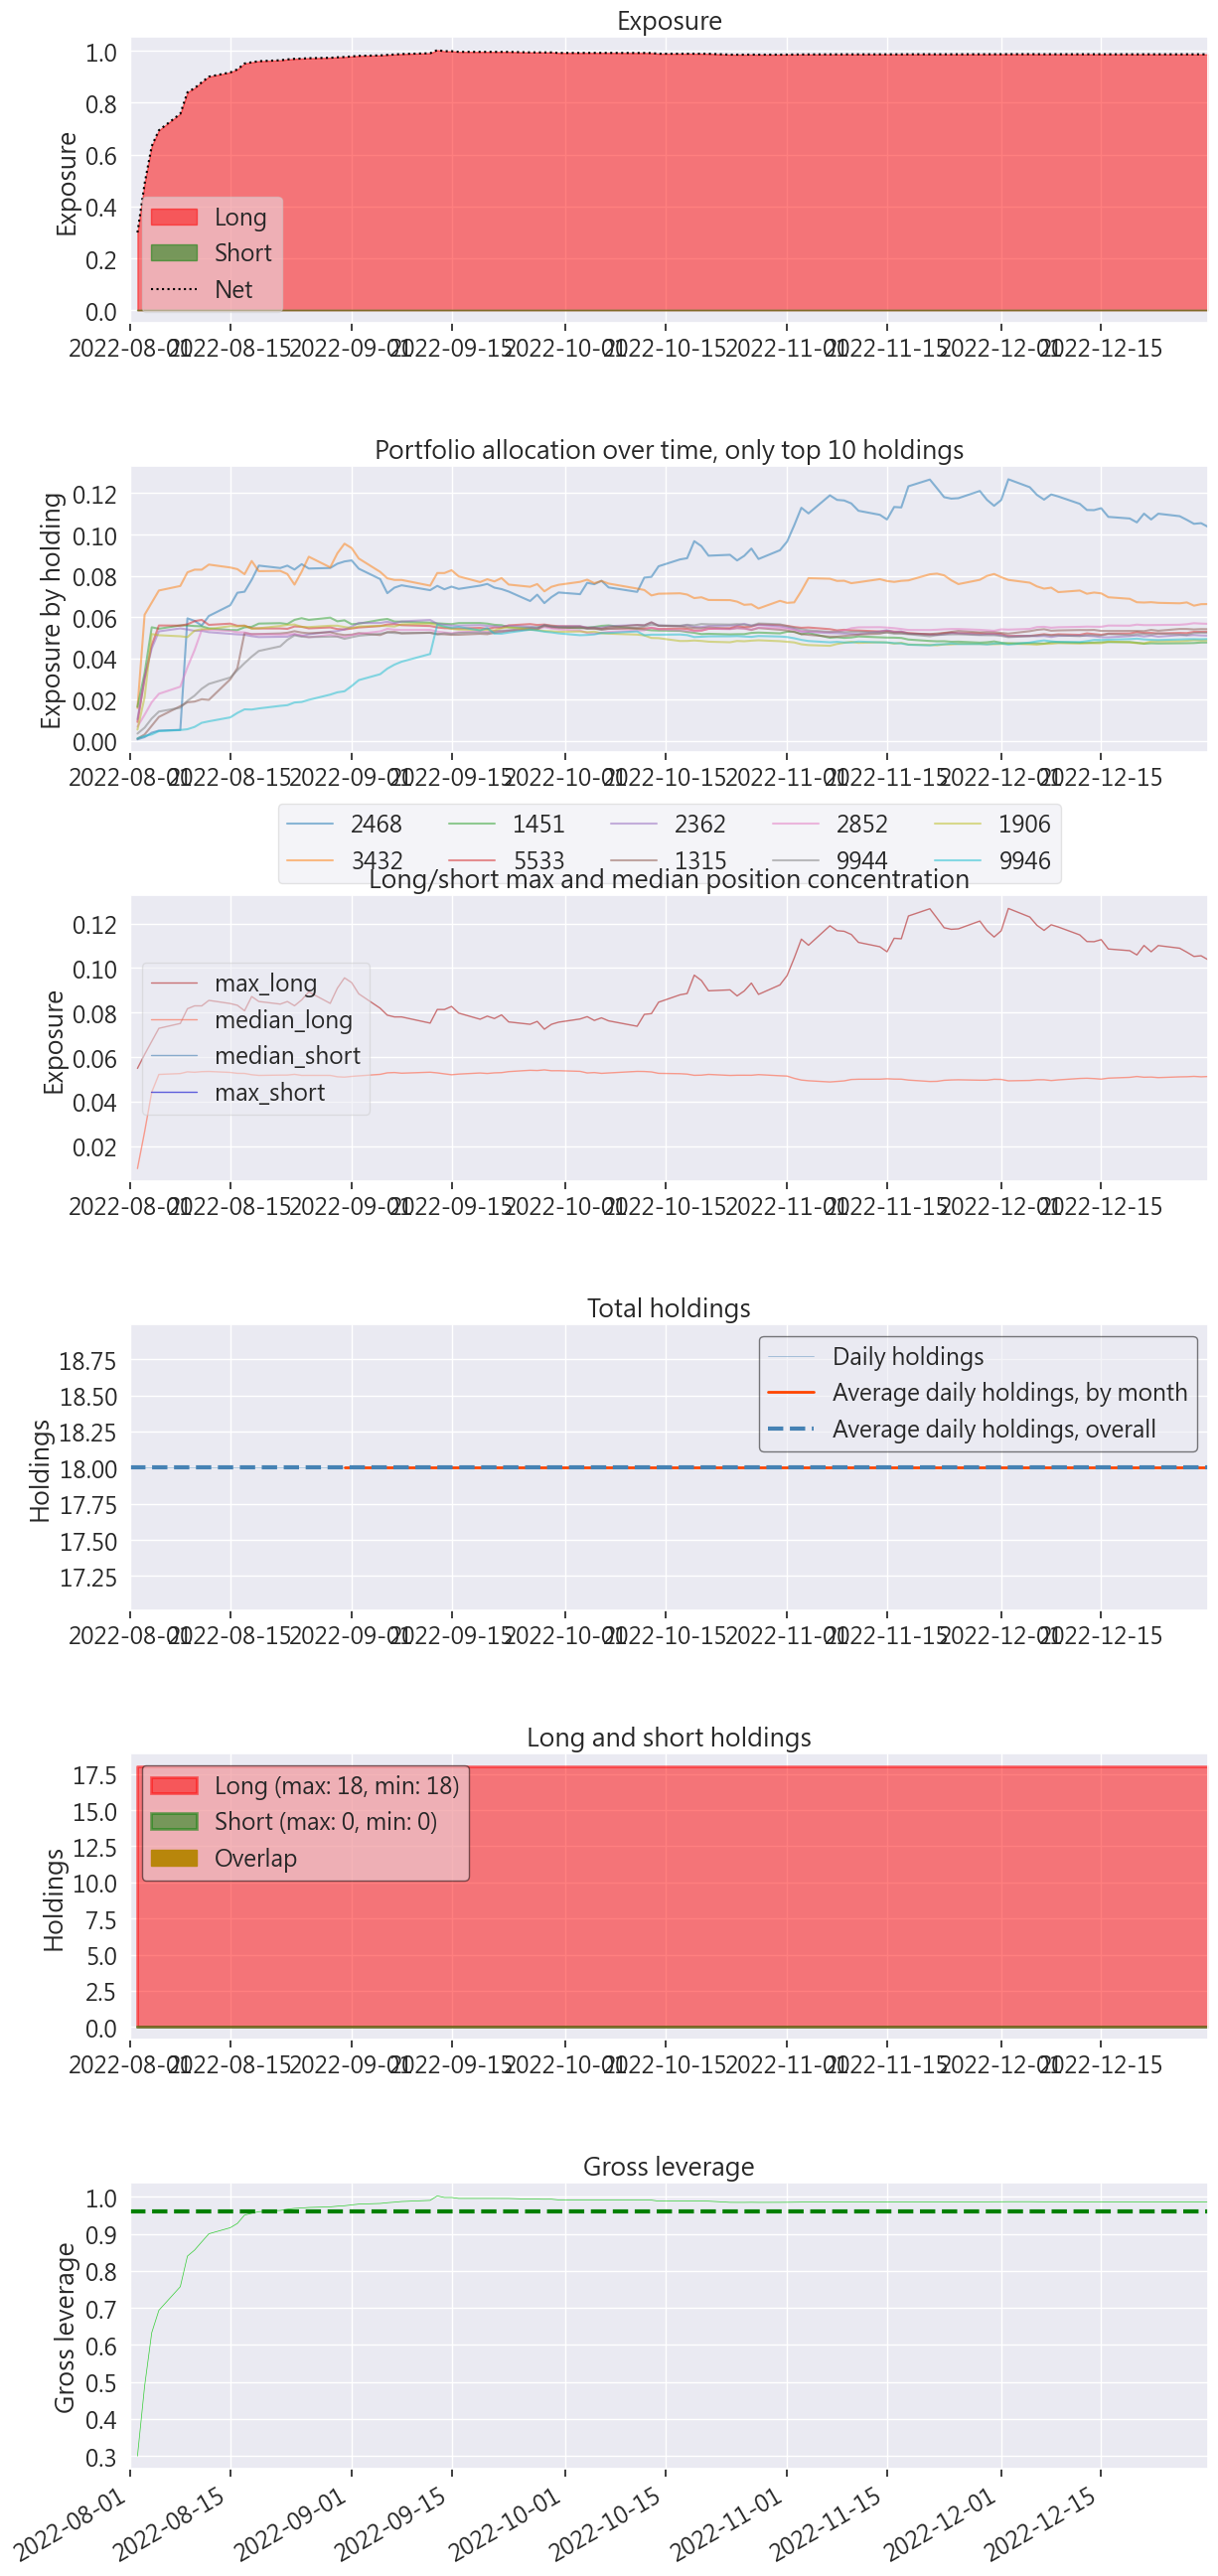

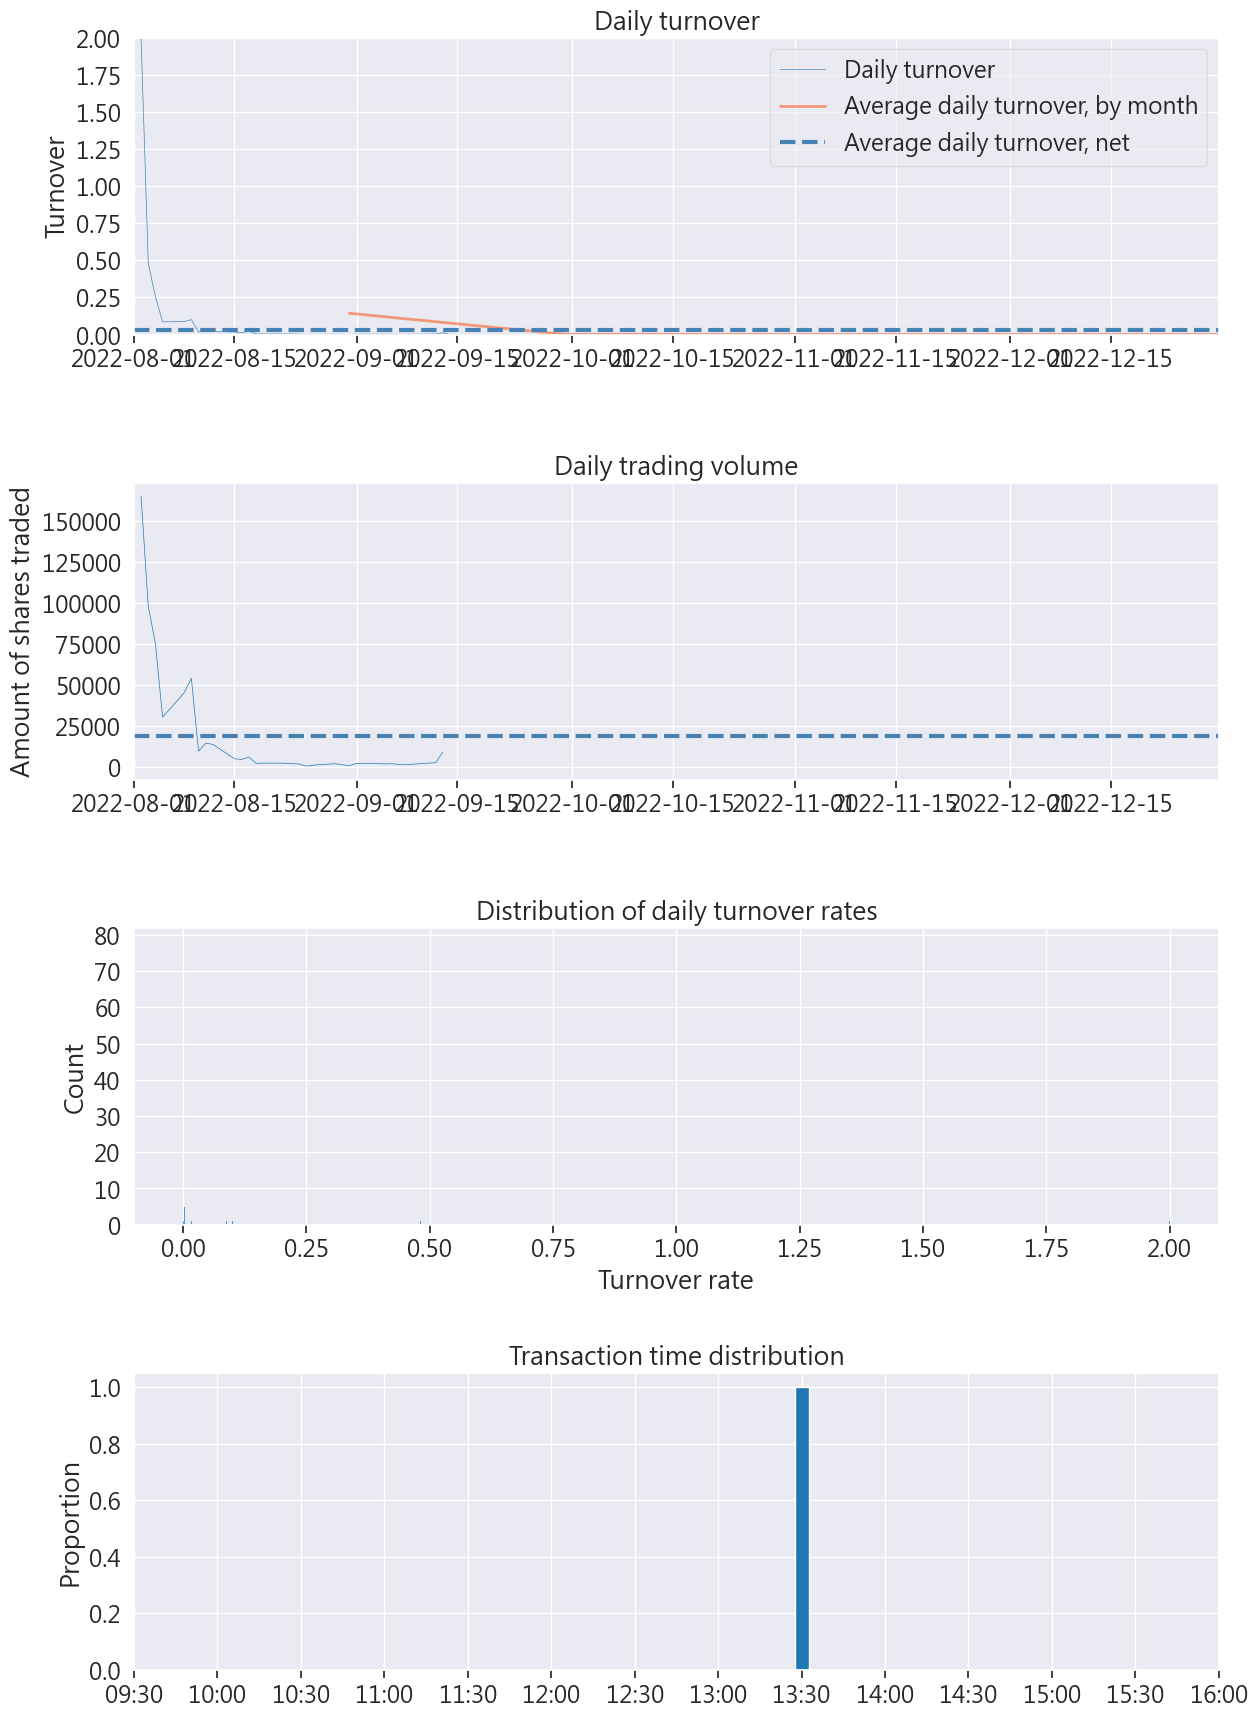

In [41]:
# 繪製 Pyfolio 中提供的所有圖表

pyfolio.tears.create_full_tear_sheet(returns=returns,
                                     positions=positions,
                                     transactions=transactions,
                                     benchmark_rets=benchmark_rets
                                    )